# Import libraries and Load data

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import decomposition
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.model_selection import GridSearchCV,train_test_split
from imblearn.over_sampling import ADASYN
from sklearn import metrics

In [2]:
#Load data
data = pd.read_csv("churn.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# DATA CLEANING!

**Based on the above info:**

**No missing values found in any column** 

**Number of rows/observations are 10000**

**Number of columns are 14**

**Data types: Correct but it's better if we change Gender**

In [5]:
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
data.describe(exclude = 'number')

,Surname,Geography
count,10000,10000
unique,2932,3
top,Smith,France
freq,32,5014


In [8]:
round(data.describe())

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5000.0,15690941.0,651.0,1.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,0.0
std,2887.0,71936.0,97.0,0.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,0.0
min,1.0,15565701.0,350.0,0.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0
25%,2501.0,15628528.0,584.0,0.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.0,0.0
50%,5000.0,15690738.0,652.0,1.0,37.0,5.0,97199.0,1.0,1.0,1.0,100194.0,0.0
75%,7500.0,15753234.0,718.0,1.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,0.0
max,10000.0,15815690.0,850.0,1.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0


In [9]:
#Drop unneeded columns
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#onehotencoder for Geography
clean_data=pd.get_dummies(data)
clean_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [11]:
#Remove outliers 
cols = ["CreditScore","Age"] # one or more

Q1 = clean_data[cols].quantile(0.25)
Q3 = clean_data[cols].quantile(0.75)
IQR = Q3 - Q1

Final_data = clean_data[~((clean_data[cols] < (Q1 - 1.5 * IQR)) |(clean_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
#Drop Geography columns because we want the model to apply for the Arabs countries :) 
X = Final_data.drop(['Exited'],axis=1)
Y = Final_data['Exited'].values

# EDA

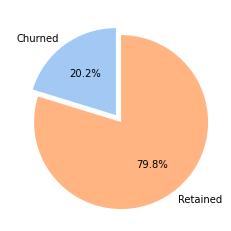

In [13]:
#Check the label balance 
colors = sns.color_palette('pastel')[0:5]
labels = ["Churned", "Retained"]
pie_label = [Final_data.Exited[Final_data['Exited']==1].count(), Final_data.Exited[Final_data['Exited']==0].count()]
explode = (0, 0.1)
plt.pie(pie_label, labels = labels,colors =colors, explode = explode, startangle = 90, autopct='%1.1f%%',)
plt.show()

In [14]:
# summarize  class distribution
counter = Counter(Y)
print(counter)

Counter({0: 7677, 1: 1949})


In [15]:
#Fixing imbalance label
oversample = ADASYN()
X, Y = oversample.fit_resample(X, Y)

In [16]:
# summarize  class distribution
counter = Counter(Y)
print(counter)

Counter({1: 7776, 0: 7677})


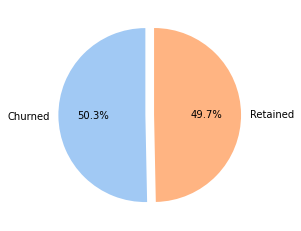

In [17]:
#Check the label balance 
colors = sns.color_palette('pastel')[0:5]
labels = ["Churned", "Retained"]
pie_label = ["7776", "7677"]
explode = (0, 0.1)
plt.pie(pie_label, labels = labels,colors =colors, explode = explode, startangle = 90, autopct='%1.1f%%',)
plt.show()
#balance label Done

<ipython-input-61-64878aa00099>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,len(X.columns)/2,i+1)
<ipython-input-61-64878aa00099>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,len(X.columns)/2,i+1)
<ipython-input-61-64878aa00099>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,len(X.columns)/2,i+1)
<ipython-input-61-64878aa00099>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,len(X.columns)/2,i+1)
<ipython-input-61-64878aa00099>:3: MatplotlibDeprecationWarning:

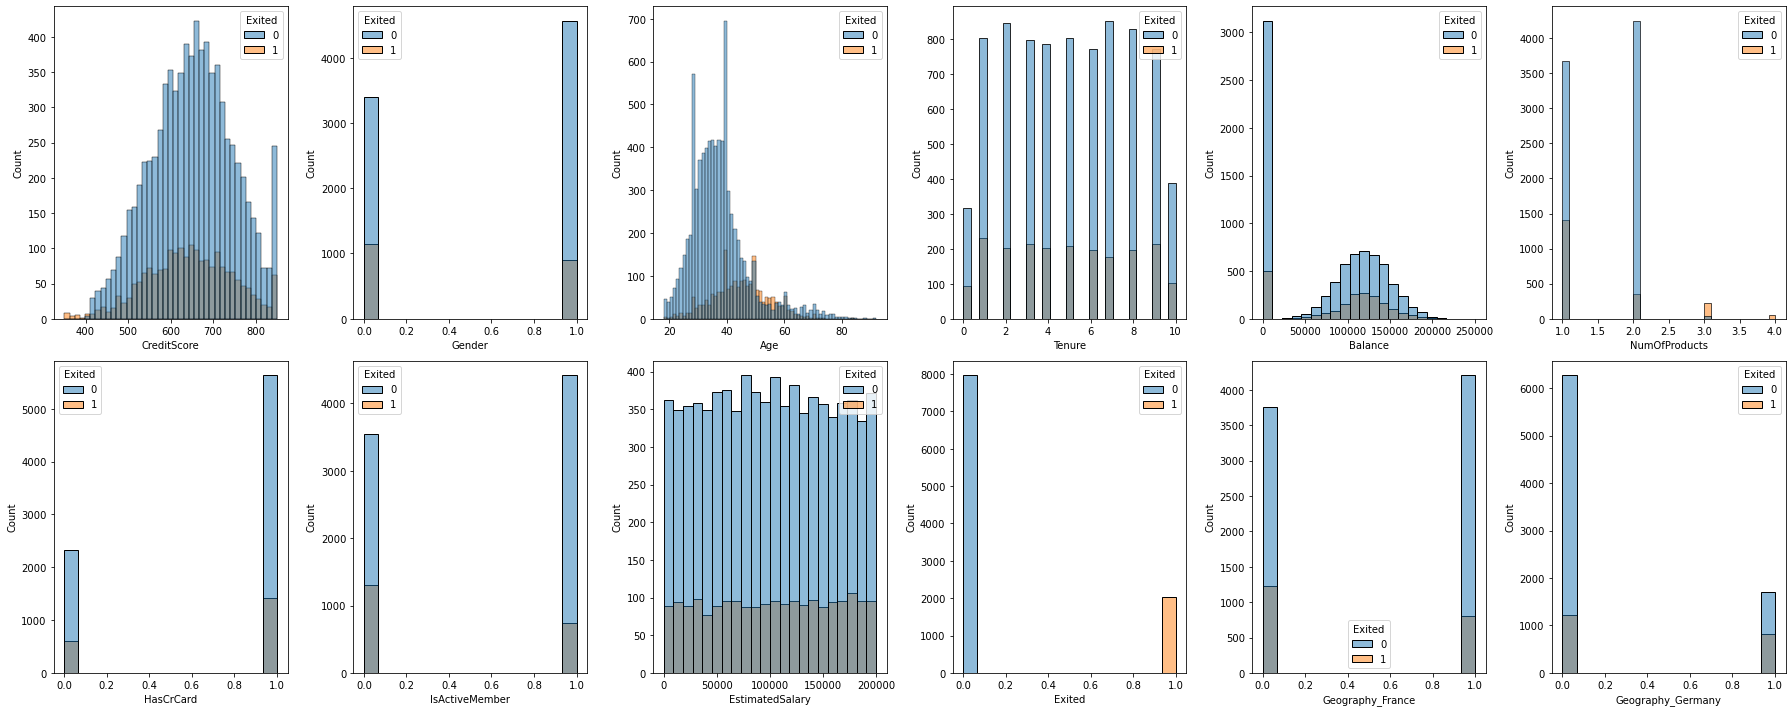

In [61]:
plt.figure(figsize=(25,10))
for i in range(0,len(X.columns)):
    plt.subplot(2,len(X.columns)/2,i+1)
    sns.histplot(clean_data, x = clean_data[clean_data.columns[i]], hue = 'Exited')
    plt.tight_layout()

<AxesSubplot:>

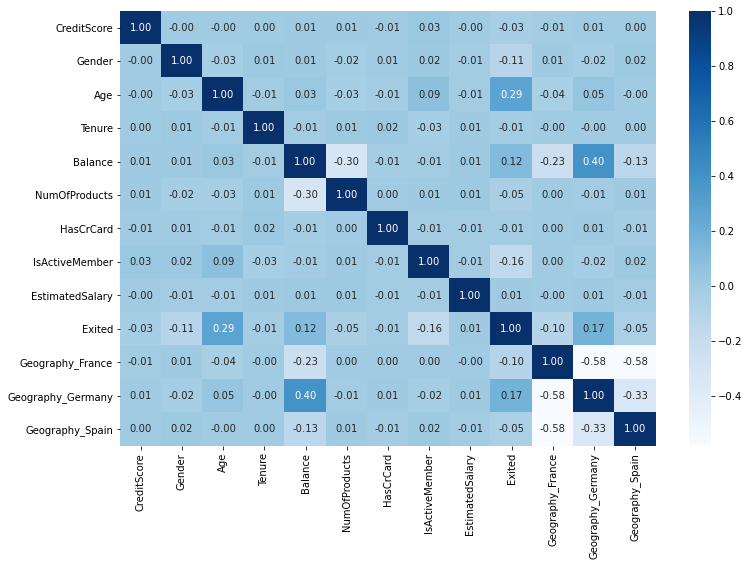

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(clean_data.corr(), cmap='Blues', annot=True, fmt = '.2f')

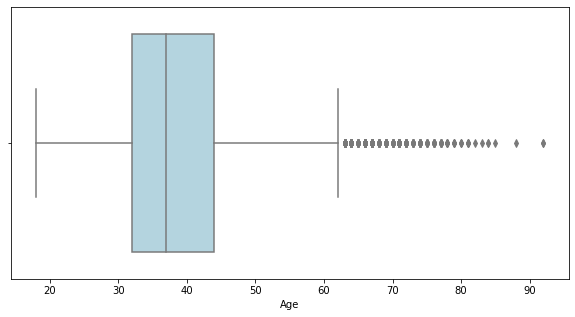

In [20]:
figure = plt.figure(figsize=(10,5))
sns.boxplot(x = 'Age', data = clean_data ,color ='lightblue');
#Checking outliers

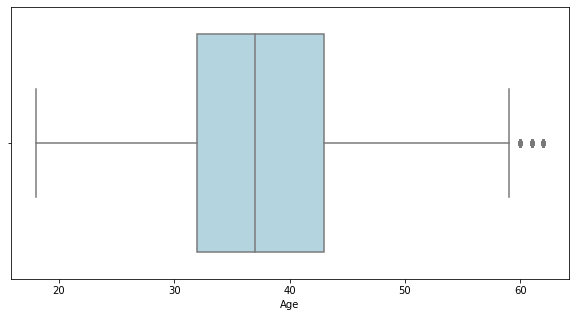

In [21]:
figure = plt.figure(figsize=(10,5))
sns.boxplot(x = 'Age', data = Final_data ,color ='lightblue');
#After removing outliers 

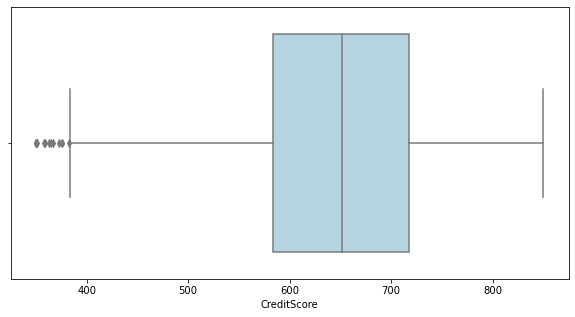

In [22]:
figure = plt.figure(figsize=(10,5))
sns.boxplot(x = 'CreditScore', data = clean_data,color ='lightblue');
##Checking outliers

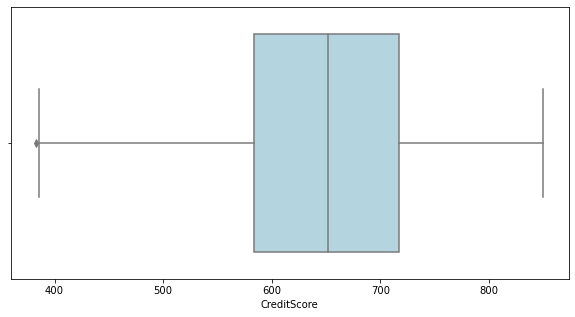

In [23]:
figure = plt.figure(figsize=(10,5))
sns.boxplot(x = 'CreditScore', data = Final_data,color ='lightblue');
#After removing outliers

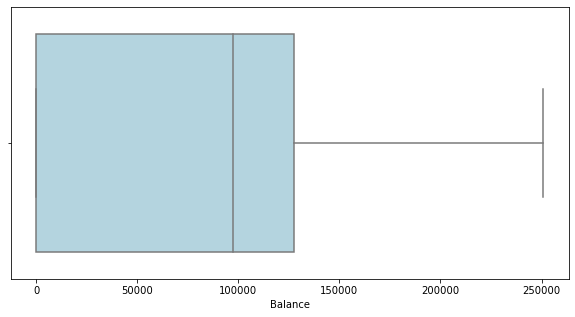

In [24]:
figure = plt.figure(figsize=(10,5))
sns.boxplot(x = 'Balance', data = Final_data,color ='lightblue');
#we can see that there no is outlier in the Balance

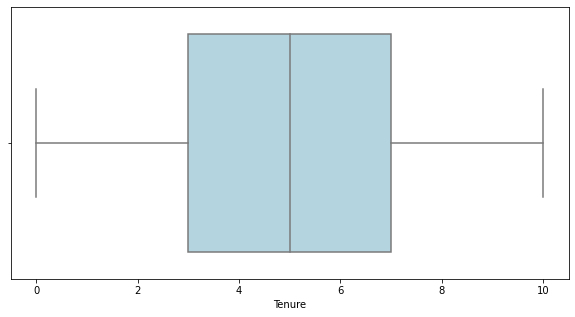

In [25]:
figure = plt.figure(figsize=(10,5))
sns.boxplot(x = 'Tenure', data = Final_data,color ='lightblue');
#we can see that there is no outlier in the Tenure

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [27]:
# Define the pipeline for scaling and model fitting
#pca = decomposition.PCA()
logistic_Reg = LogisticRegression(C=35.564803062231285, penalty='l2')
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ('logistic_Reg', logistic_Reg)
])

In [28]:
LR_model =logistic_Reg.fit(X_train, y_train)
LR_y_pred = LR_model.predict(X_test)
#Model Score
print("The accuracy  score for logistic regression is")
print("Training:{}%".format(round(LR_model.score(X_train, y_train)*100)))
print("Test set: {}%".format(round(LR_model.score(X_test, y_test)*100)))

The accuracy  score for logistic regression is
Training:68%
Test set: 67%


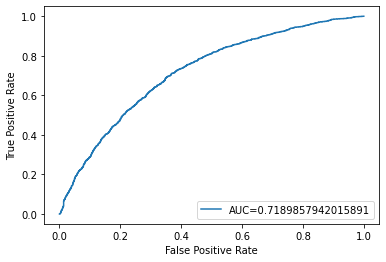

In [29]:
#define metrics
y_pred_proba = LR_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
#The closer AUC is to 1, the better the model

In [51]:
#pca = decomposition.PCA()
SVC =LinearSVC()
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ('SVC',SVC)
])

In [52]:
SVC_model =pipeline.fit(X_train, y_train)
SVC_y_pred = SVC_model.predict(X_test)
#Model Score
print("The accuracy  score for Support Vector Classification is")
print("Training:{}%".format(round(SVC_model.score(X_train, y_train)*100)))
print("Test set: {}%".format(round(SVC_model.score(X_test, y_test)*100)))

The accuracy  score for Support Vector Classification is
Training:83%
Test set: 83%


In [53]:
knn = KNeighborsClassifier()
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ('knn',knn)
])

In [54]:
knn_model =pipeline.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
#Model Score
print("The accuracy score for k-nearest neighbor is")
print("Training:{}%".format(round(knn_model.score(X_train, y_train)*100)))
print("Test set: {}%".format(round(knn_model.score(X_test, y_test)*100)))

The accuracy score for k-nearest neighbor is
Training:89%
Test set: 84%


In [56]:
RF = RandomForestClassifier(max_depth=8)
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ('RF',RF)
])

In [57]:
RF_model =pipeline.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_test)
#Model Score
print("The accuracy score for Random Forest Classifier is")
print("Training:{}%".format(round(RF_model.score(X_train, y_train)*100)))
print("Test set: {}%".format(round(RF_model.score(X_test, y_test)*100)))

The accuracy score for Random Forest Classifier is
Training:88%
Test set: 86%


In [58]:
voting = VotingClassifier(
    estimators = [('RF_model',RF_model),('knn_model',knn_model), ('SVC_model',SVC_model)],
    voting='hard')
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ('voting',voting)
])

In [59]:
voting_model =pipeline.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
#Model Score
print("The accuracy score for Voting Classifier is")
print("Training:{}%".format(round(voting_model.score(X_train, y_train)*100)))
print("Test set: {}%".format(round(voting_model.score(X_test, y_test)*100)))

The accuracy score for Voting Classifier is
Training:87%
Test set: 86%


## GridSearchCV

### Hyperparameter Tuning the Random Forest

In [38]:
# Create the parameter grid based on the results of random search 
RF = RandomForestClassifier(bootstrap= True, max_depth=20,min_samples_leaf= 3, min_samples_split= 8,n_estimators= 30)
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30]
}
# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy',
                          cv = 3, n_jobs = -1, verbose = 2).fit(X, Y)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [39]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 20}

In [40]:
RF = RandomForestClassifier(bootstrap= True, max_depth=20,max_features= 3,min_samples_leaf= 3, min_samples_split= 8,n_estimators= 20)
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ('RF',RF)
])

In [41]:
RF_model =pipeline.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_test)
#Model Score
print("The accuracy score for Random Forest Classifier is")
print("Training:{}%".format(round(RF_model.score(X_train, y_train)*100)))
print("Test set: {}%".format(round(RF_model.score(X_test, y_test)*100)))

The accuracy score for Random Forest Classifier is
Training:94%
Test set: 88%
